In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# **DATASET PREPARATION**

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d kaustubhdikshit/neu-surface-defect-database

Dataset URL: https://www.kaggle.com/datasets/kaustubhdikshit/neu-surface-defect-database
License(s): unknown


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/neu-surface-defect-database.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## **Data preprocessing**

In [9]:

data = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = data.flow_from_directory(
    directory='/content/NEU-DET/train/images',
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

val_data = data.flow_from_directory(
    directory='/content/NEU-DET/train/images',
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 1152 images belonging to 6 classes.
Found 288 images belonging to 6 classes.


In [10]:
# Simple CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile model with SGD optimizer
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,662 (3.14 MB)

 Trainable params: 822,662 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

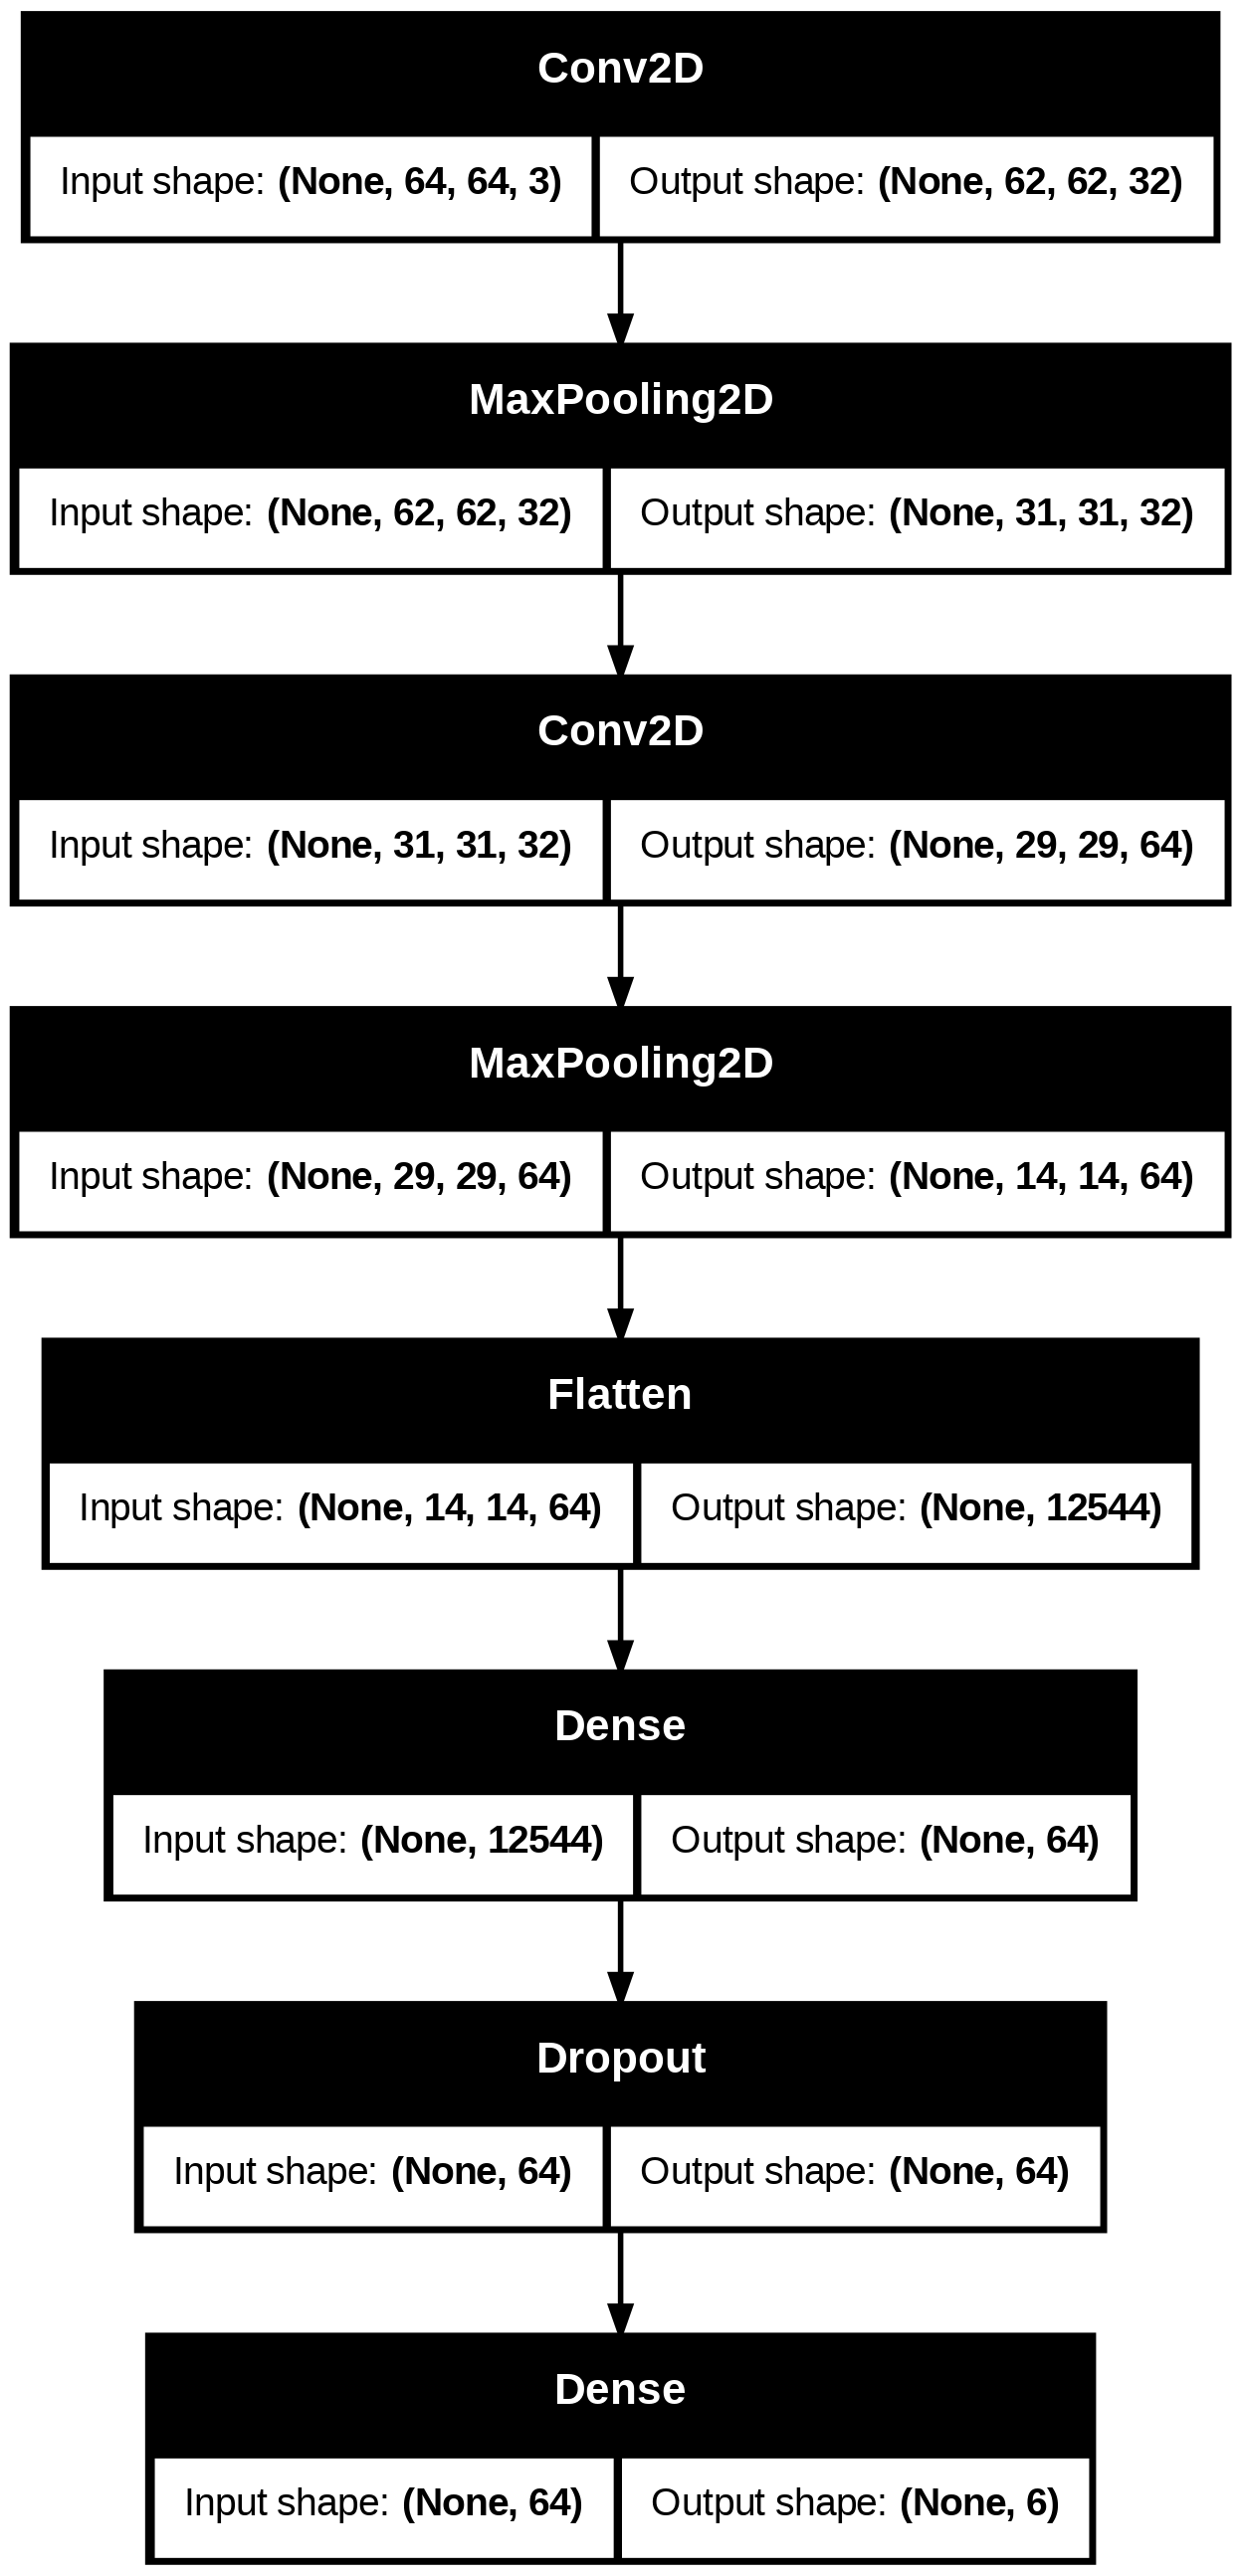

In [13]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

In [14]:
# Train model (fewer epochs)
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.1799 - loss: 1.7882 - val_accuracy: 0.1701 - val_loss: 1.7646
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1876 - loss: 1.7619 - val_accuracy: 0.1979 - val_loss: 1.7257
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2606 - loss: 1.7083 - val_accuracy: 0.2986 - val_loss: 1.6727
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3375 - loss: 1.6426 - val_accuracy: 0.3542 - val_loss: 1.6155
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3379 - loss: 1.6007 - val_accuracy: 0.3368 - val_loss: 1.5988
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3432 - loss: 1.5654 - val_accuracy: 0.3785 - val_loss: 1.4895
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3712 - loss: 1.5466 - val_accuracy: 0.3993 - val_loss: 1.4666
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4410 - loss: 1.4329 - val_accuracy: 0.4444 - val_loss: 1.

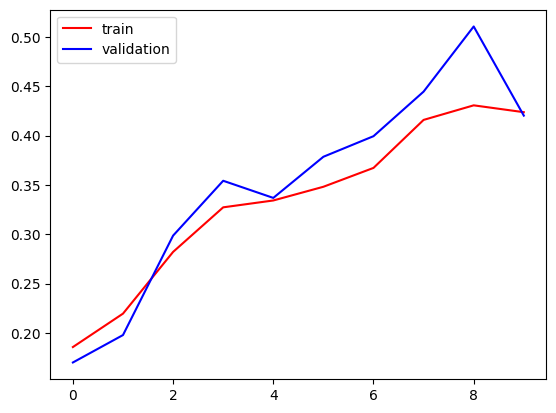

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

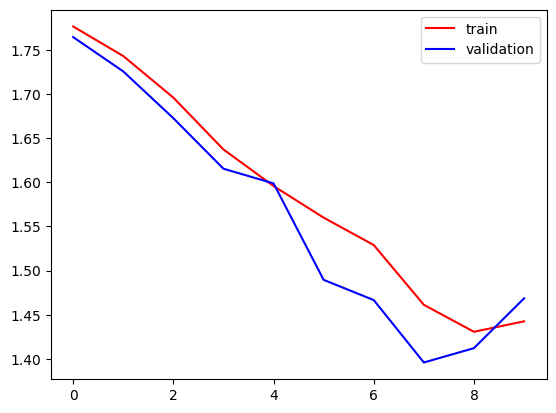

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
# Get a single batch from the generator
images, labels = next(train_data)

# Import required libraries for visualization
import matplotlib.pyplot as plt

# Get the first image from the batch (index 0)
image = images[10]

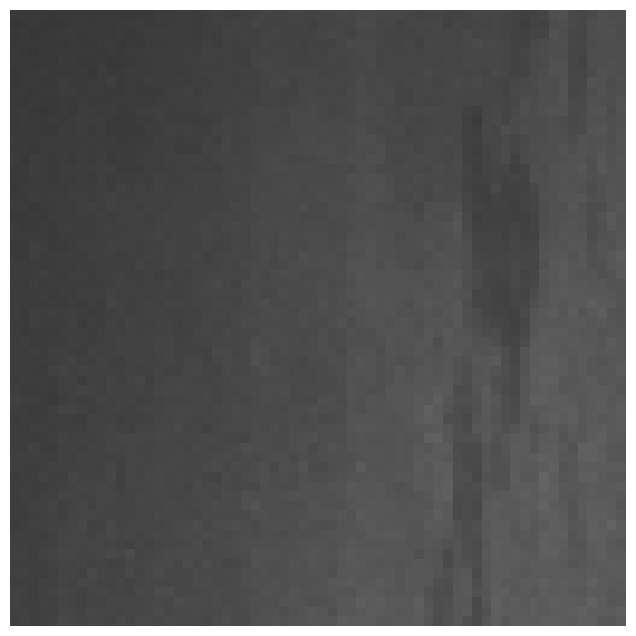

In [18]:
# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

In [19]:
# If you want to see the corresponding label
print("Label:", labels[0])

Label: [0. 0. 0. 0. 0. 1.]


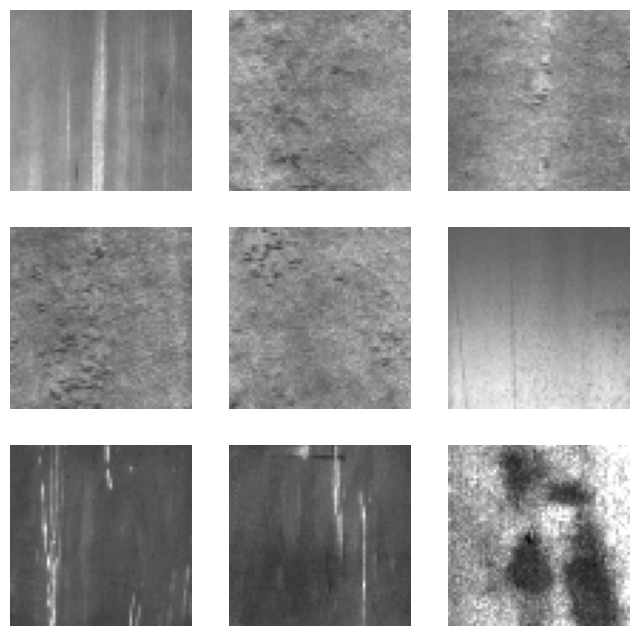

Class names: ['crazing', 'inclusion', 'patches', 'pitted_surface', 'rolled-in_scale', 'scratches']


In [20]:
# To view multiple images from the batch
plt.figure(figsize=(8, 8))
for i in range(9):  # Display first 9 images
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

# You can also get class names from the generator
class_names = list(train_data.class_indices.keys())
print("Class names:", class_names)

In [21]:
import numpy as np
# First, let's see what we have
images, labels = next(val_data)
single_image = images[2]
input_image = np.expand_dims(single_image, axis=0)

# Make prediction
predictions = model.predict(input_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


In [22]:
# Make prediction
predictions = model.predict(input_image)

# Let's print some debug information
print("Shape of predictions:", predictions.shape)
print("Predicted class index:", np.argmax(predictions[0]))

# Print the actual class_names
print("\nAvailable class names:")
print(train_data.class_indices)

# Now let's fix the visualization
predicted_class = np.argmax(predictions[0])
class_names = list(val_data.class_indices.keys())  # Get class names from data generator

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Shape of predictions: (1, 6)
Predicted class index: 2

Available class names:
{'crazing': 0, 'inclusion': 1, 'patches': 2, 'pitted_surface': 3, 'rolled-in_scale': 4, 'scratches': 5}


In [23]:
# Double check if the index is valid
print("\nNumber of classes:", len(class_names))
print("Predicted class index:", predicted_class)


Number of classes: 6
Predicted class index: 2


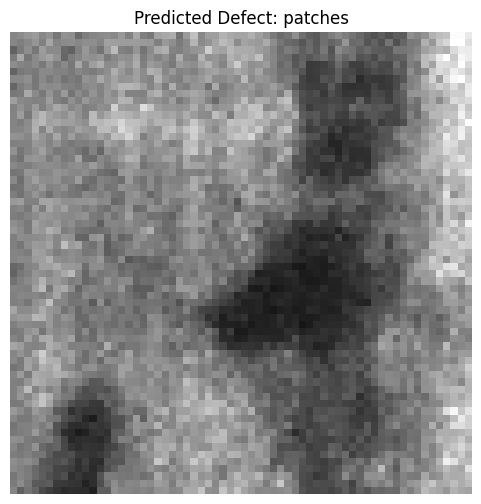

In [24]:
# Now display with verification
plt.figure(figsize=(6, 6))
plt.imshow(single_image)
if predicted_class < len(class_names):
    plt.title(f'Predicted Defect: {class_names[predicted_class]}')
else:
    plt.title(f'Predicted Class Index: {predicted_class} (Warning: Index out of range)')
plt.axis('off')
plt.show()

In [25]:
# Print all probabilities
for i, prob in enumerate(predictions[0]):
    if i < len(class_names):
        print(f'{class_names[i]}: {prob:.2%}')
    else:
        print(f'Class {i}: {prob:.2%}')

crazing: 14.59%
inclusion: 10.60%
patches: 27.99%
pitted_surface: 16.85%
rolled-in_scale: 24.42%
scratches: 5.55%


In [26]:
# Evaluate on validation data
loss, accuracy = model.evaluate(val_data)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4163 - loss: 1.4768
Validation Loss: 1.4685
Validation Accuracy: 0.4201


In [33]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

def check_new_data(model, new_data_dir, target_size=(64, 64)):
    results = {}
    for filename in os.listdir(new_data_dir):
        if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
            continue
        img_path = os.path.join(new_data_dir, filename)
        try:
            img = image.load_img(img_path, target_size=target_size)
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

            predictions = model.predict(img_array)
            predicted_class = np.argmax(predictions[0])
            probabilities = {class_names[i]: float(prob) for i, prob in enumerate(predictions[0])}
            results[filename] = {
                'prediction': predicted_class,
                'probabilities': probabilities,
                'classification_successful': True
            }

        except Exception as e:
            print(f"Error processing {filename}: {e}")
            results[filename] = {
                'prediction': None,
                'probabilities': None,
                'classification_successful': False
            }
    return results


# Example usage (assuming 'new_images' directory exists):

new_images_dir = '/content/TEST UNSEEN' # Create this directory and add images
classification_results = check_new_data(model, new_images_dir)

for filename, result in classification_results.items():
    print(f"File: {filename}")
    if result['classification_successful']:
      print(f"  Predicted Class: {class_names[result['prediction']]}")
      print("  Probabilities:")
      for class_name, prob in result['probabilities'].items():
          print(f"    {class_name}: {prob:.2%}")
    else:
        print("  Classification failed.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
File: Surface-defects-in-a-strip-after-hot-rolling.png
  Predicted Class: rolled-in_scale
  Probabilities:
    crazing: 12.32%
    inclusion: 9.06%
    patches: 19.67%
    pitted_surface: 21.08%
    rolled-in_scale: 30.37%
    scratches: 7.51%
File: Steel-surface-defect-image-a-Crazing-b-inclusions-c-patches-d-pitted-surface.png
  Predicted Class: pitted_surface
  Probabilities:
    crazing: 11.21%
    inclusion: 2.95%
    patches: 31.00%
    pitted_surface: 31.61%
    rolled-in_scale: 20.75%
    scratches: 2.48%
File: 40747_2023_1180_Fig1_HTML.jpg
  Predicted Class: pitted_surface
  Probabilities:
    crazing: 13.99%
    inclusion: 4.15%
    patches: 15.86%
    pitted_surface: 41.76%
    rolled-in_scale: 19.08%
    scratches: 5.15%


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Classification Report:
                 precision    recall  f1-score   support

        crazing       0.00      0.00      0.00        48
      inclusion       0.12      0.21      0.16        48
        patches       0.33      0.10      0.16        48
 pitted_surface       0.15      0.35      0.22        48
rolled-in_scale       0.19      0.31      0.23        48
      scratches       0.00      0.00      0.00        48

       accuracy                           0.16       288
      macro avg       0.13      0.16      0.13       288
   weighted avg       0.13      0.16      0.13       288



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


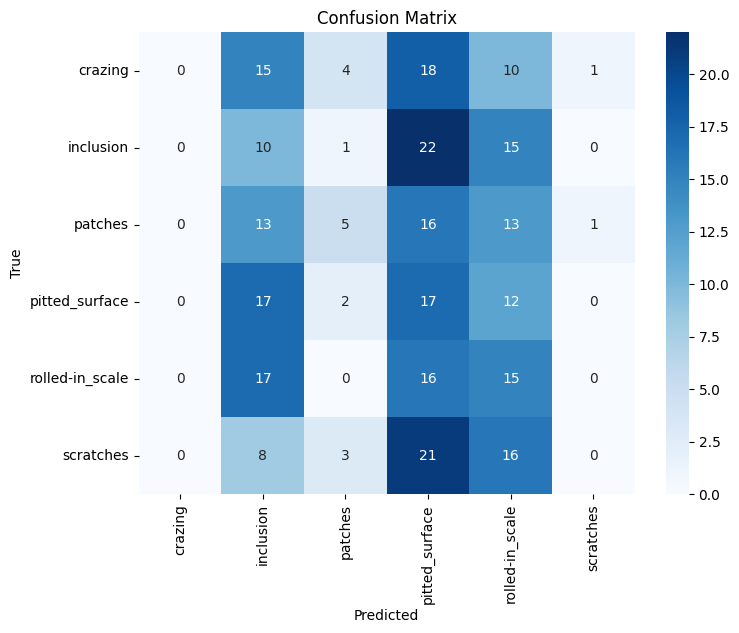

In [27]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get true labels and predictions
val_data.reset()
y_true = val_data.classes
y_pred_probs = model.predict(val_data)
y_pred = np.argmax(y_pred_probs, axis=1)

# Class labels
class_labels = list(val_data.class_indices.keys())

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision, recall, F1 (macro, micro, weighted)
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

precision_weighted = precision_score(y_true, y_pred, average='weighted')
recall_weighted = recall_score(y_true, y_pred, average='weighted')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

print(f"Macro Precision: {precision_macro:.4f}")
print(f"Macro Recall: {recall_macro:.4f}")
print(f"Macro F1-score: {f1_macro:.4f}")
print("")

print(f"Weighted Precision: {precision_weighted:.4f}")
print(f"Weighted Recall: {recall_weighted:.4f}")
print(f"Weighted F1-score: {f1_weighted:.4f}")


Macro Precision: 0.1330
Macro Recall: 0.1632
Macro F1-score: 0.1271

Weighted Precision: 0.1330
Weighted Recall: 0.1632
Weighted F1-score: 0.1271


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


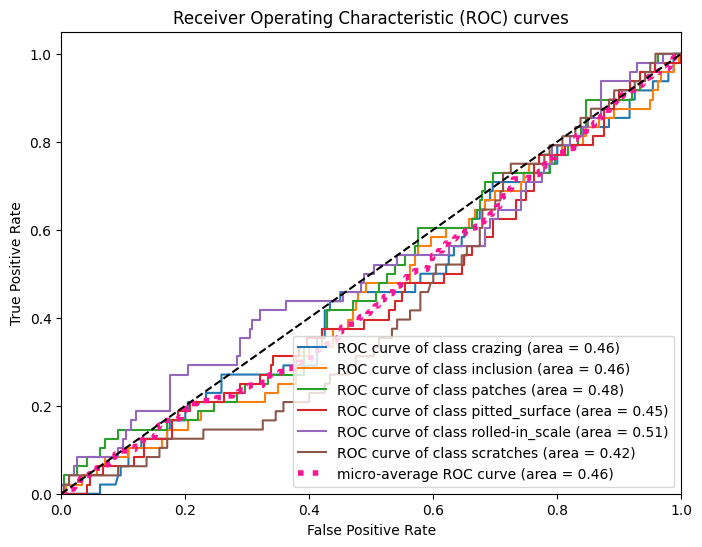

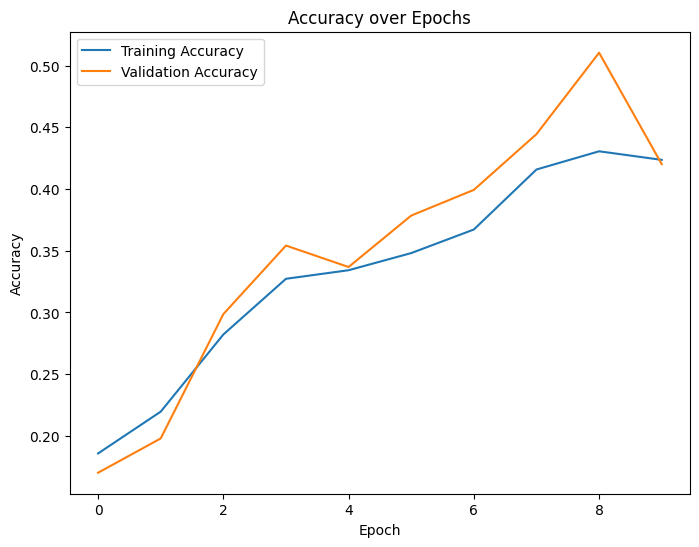

In [29]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output labels
y_true_bin = label_binarize(y_true, classes=np.arange(len(class_labels)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_true_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class and the micro-average
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {class_labels[i]} (area = {roc_auc[i]:0.2f})')

plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curves')
plt.legend(loc="lower right")
plt.show()


#Plot AOC curve
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**We can say that, this model is underfitting by analysing learning curve, ROC curve and LOW model accurary and POOR data generalization of data(test unseen data)**